In [2]:
%%capture
%run EOMs.ipynb
from scipy.optimize import fsolve

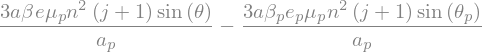

In [3]:
ndot

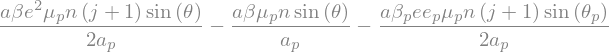

In [4]:
edot

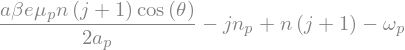

In [5]:
thpdot

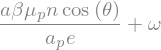

In [6]:
pomdot

# $\theta_p$ circulating, $\theta$ fixed

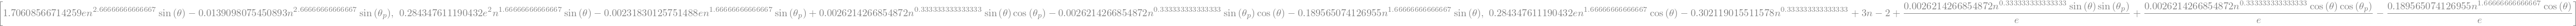

In [103]:
convs = {a: n ** (2.0 / 3), pom: omp * t + thp - th}
params = {
    j: 2,
    mup: 1e-1,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    np: 1,
    ap: 1,
    ep: 0.01,
    omp: 0.000,
    om: 0.000,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params)).expand()
    for iterfun in [ndot, edot + edsec, (thpdot + omp - pomdot - pomdsec)]
]
funs

Here we assume $\cos\theta_p$ and $\sin\theta_p$ average to zero

In [104]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0}) for iterfun in funs]

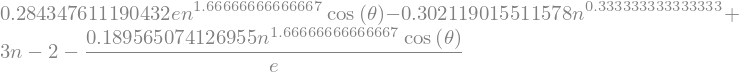

In [105]:
for fun in funs:
    display(fun)

In [106]:
_func = lambdify([n,e,th],funs)
def _f(y):
    return _func(*y)

## Dependence on initial guesses (are there multiple equilibria?)

In [109]:
init_ths = npy.linspace(0,2*npy.pi,100)
eqs_n = []
eqs_e = []
eqs_th = []
for init_th in init_ths:
    eq = fsolve(_f, [0.7, 0.01, init_th],xtol=1e-16)
    eqs_n += [eq[0]]
    eqs_e += [eq[1]]
    eqs_th += [eq[2]]

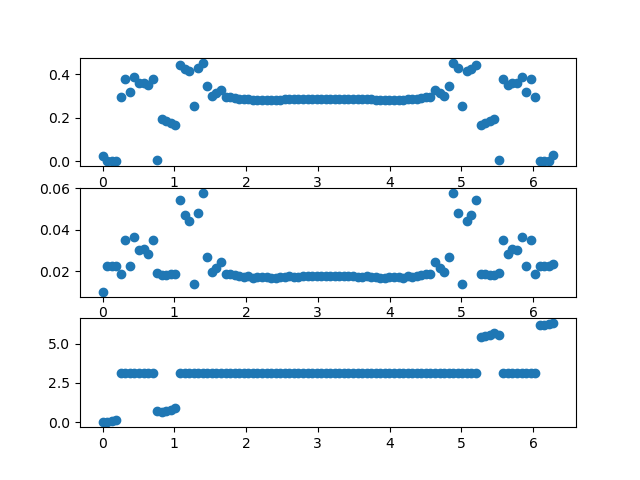

In [110]:
fig, ax= plt.subplots(3)
ax[0].scatter(init_ths,eqs_n)
ax[1].scatter(init_ths,eqs_e)
ax[2].scatter(init_ths,eqs_th)

I think this is a numerical artifact or error, because it depends on the initial guess for $e$, i.e. solutions for $e_0=0.1$ are near $0.1$, and $e_0=0.01$ are near $0.01$. Maybe this is a relic of setting the parameter k or something in the Hamiltonian? I don't know. But if you also look at the equations, $e_p$ disappears in this treatment. Overall I am skeptical that this is a true thing here in this treatment.

But this raises the further question of why i can't find equilibrium here?

Maybe $\cos\theta_p$ and $\sin\theta_p$ don't average to zero?

Others to try:
- $\theta_p-\theta$ locked
- $\theta_p$ locked and $\theta$ circulating